# Elaborar um modelo de aprendizagem de máquina

## Integrantes do Grupo:
* ALEXANDRE FERNANDES DE OLIVEIRA BESSA
* LUAN DOS SANTOS BARBOSA
* LUIS VITOR GOMES ALVES DA SILVA
* PEDRO HENRIQUE TEBERGES CAVALCANTI
* RYANDRO DA SILVA TAVARES

Dados: https://www.kaggle.com/datasets/rehan497/students-social-media-addiction

## Importação das bibliotecas

Abaixo será realizado todas importações que o projeto precisa para funcionamento.

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

## 1 - Entendimento dos Dados

Para começarmos realizamos o carregamento dos dados e visualização das primeiras linhas do dataset.

In [359]:
df = pd.read_csv('Students_Social_Media_Addiction_Modified.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1.00,19.00,Female,Undergraduate,Bangladesh,5.20,Instagram,Yes,6.50,6.00,In Relationship,3.00,8.00
1,2.00,22.00,Male,Graduate,India,2.10,Twitter,No,7.50,8.00,Single,0.00,3.00
2,3.00,20.00,NaN,Undergraduate,USA,6.00,TikTok,Yes,5.00,5.00,Complicated,4.00,9.00
3,4.00,18.00,Male,High School,UK,3.00,YouTube,No,7.00,7.00,Single,1.00,4.00
4,5.00,21.00,Male,Graduate,Canada,NaN,Facebook,Yes,6.00,6.00,In Relationship,2.00,7.00


Fazemos a contagem de linhas e colunas para conferir se está dentro do mínimo requisitado.

In [360]:
df.shape

(705, 13)

Para termos uma visão melhor da situação usamos info() para visualizar todo o dataset.

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    691 non-null    float64
 1   Age                           691 non-null    float64
 2   Gender                        691 non-null    object 
 3   Academic_Level                691 non-null    object 
 4   Country                       691 non-null    object 
 5   Avg_Daily_Usage_Hours         691 non-null    float64
 6   Most_Used_Platform            691 non-null    object 
 7   Affects_Academic_Performance  691 non-null    object 
 8   Sleep_Hours_Per_Night         691 non-null    float64
 9   Mental_Health_Score           691 non-null    float64
 10  Relationship_Status           691 non-null    object 
 11  Conflicts_Over_Social_Media   691 non-null    float64
 12  Addicted_Score                691 non-null    float64
dtypes: fl

Conferimos as estatísticas descritivas da colunas númericas.

In [362]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,691.00,691.00,691.00,691.00,691.00,691.00,691.00
mean,351.84,20.40,4.92,6.86,6.23,2.85,6.42
std,203.82,2.92,1.25,1.13,1.10,0.96,1.60
min,1.00,-5.00,1.50,3.80,4.00,0.00,2.00
25%,175.50,19.00,4.10,6.00,5.00,2.00,5.00
50%,351.00,21.00,4.80,6.90,6.00,3.00,7.00
75%,528.50,22.00,5.80,7.70,7.00,4.00,8.00
max,705.00,24.00,8.50,9.60,9.00,5.00,9.00


In [363]:
df['Affects_Academic_Performance'].value_counts()
df['Affects_Academic_Performance'].value_counts(normalize=True) * 100

Affects_Academic_Performance
Yes   64.40
No    35.60
Name: proportion, dtype: float64

Verificamos os valores nulos presente no dataset e percebe-se 14 em cada coluna

NOTA: para podermos trabalhar nesse dataset foi preciso utilizar do ChatGPT para criar valores inconsistente.

In [364]:
df.isnull().sum()

Student_ID                      14
Age                             14
Gender                          14
Academic_Level                  14
Country                         14
Avg_Daily_Usage_Hours           14
Most_Used_Platform              14
Affects_Academic_Performance    14
Sleep_Hours_Per_Night           14
Mental_Health_Score             14
Relationship_Status             14
Conflicts_Over_Social_Media     14
Addicted_Score                  14
dtype: int64

Com base no dataset, a variável alvo escolhida será a "Affects_Academic_Performance", onde iremos medir a performance da cada aluno.

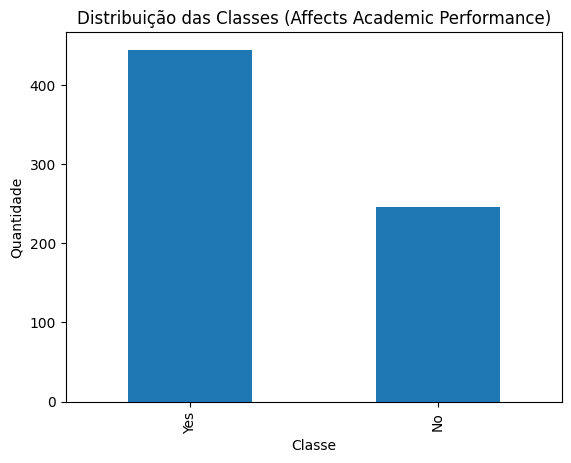

In [365]:
df['Affects_Academic_Performance'].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes (Affects Academic Performance)')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

## 2 - Processamento e Tratamento dos Dados

### 2.1 - Verificação e Tratamento de Nulos/tipos

In [366]:
numericas = df.select_dtypes(include=['float64', 'int64']).columns
categoricas = df.select_dtypes(include=['object']).columns

df[numericas] = df[numericas].fillna(df[numericas].mean())

for col in categoricas:
    df[col] = df[col].fillna(df[col].mode()[0])

In [367]:
colunas_inteiras = ['Student_ID', 'Age', 'Conflicts_Over_Social_Media', 'Addicted_Score']

for col in colunas_inteiras:
    df[col] = df[col].astype(int)

In [368]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [369]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [370]:
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score             float64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [371]:
df.head(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.20,Instagram,Yes,6.50,6.00,In Relationship,3,8
1,2,22,Male,Graduate,India,2.10,Twitter,No,7.50,8.00,Single,0,3
2,3,20,Female,Undergraduate,USA,6.00,TikTok,Yes,5.00,5.00,Complicated,4,9
3,4,18,Male,High School,UK,3.00,YouTube,No,7.00,7.00,Single,1,4
4,5,21,Male,Graduate,Canada,4.92,Facebook,Yes,6.00,6.00,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.20,Instagram,Yes,4.50,4.00,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.50,LinkedIn,No,8.00,9.00,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.80,Snapchat,Yes,6.00,6.00,In Relationship,2,8
8,9,18,Male,High School,Japan,4.00,TikTok,No,6.50,7.00,Single,1,5
9,10,21,Female,Graduate,South Korea,3.30,Instagram,No,6.86,7.00,In Relationship,1,4


### 2.2 - Aplicação do One-Hot Encoding

In [372]:
df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

In [373]:
df['Affects_Academic_Performance'].value_counts()

Affects_Academic_Performance
1    459
0    246
Name: count, dtype: int64

In [374]:
X = df.drop('Affects_Academic_Performance', axis=1)
y = df['Affects_Academic_Performance']

X = pd.get_dummies(X, drop_first=True)

In [375]:
X.head()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Academic_Level_High School,Academic_Level_Undergraduate,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
0,1,19,5.20,6.50,6.00,3,8,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,2,22,2.10,7.50,8.00,0,3,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,3,20,6.00,5.00,5.00,4,9,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,4,18,3.00,7.00,7.00,1,4,True,True,False,...,False,False,False,False,False,False,False,True,False,True
4,5,21,4.92,6.00,6.00,2,7,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [376]:
X.shape

(705, 130)

## 3 - Separação de Treino/Teste e Escalonamento

In [377]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [378]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## 4 - Treinar Modelo e Registro dos Hiperparâmetros

In [379]:
lr = LogisticRegression(
    penalty='l2',        # regularização L2
    C=1.0,               # força da regularização
    solver='liblinear',  # bom para datasets pequenos
    random_state=42
)

In [380]:
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [381]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred  = lr.predict(X_test_scaled)

In [382]:
print("=== Treino ===")
print("Acurácia:", accuracy_score(y_train, y_train_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

=== Treino ===
Acurácia: 0.9911347517730497
Matriz de Confusão:
 [[197   0]
 [  5 362]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       197
           1       1.00      0.99      0.99       367

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564



In [383]:
print("\n=== Teste ===")
print("Acurácia:", accuracy_score(y_test, y_test_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


=== Teste ===
Acurácia: 0.9929078014184397
Matriz de Confusão:
 [[49  0]
 [ 1 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.99      0.99        92

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



In [384]:
print("\nHiperparâmetros utilizados na Regressão Logística:")
for key, value in lr.get_params().items():
    print(f"{key}: {value}")


Hiperparâmetros utilizados na Regressão Logística:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: deprecated
n_jobs: None
penalty: l2
random_state: 42
solver: liblinear
tol: 0.0001
verbose: 0
warm_start: False


## 5 - Avaliação do Modelo e Regressão Logística

In [385]:
y_pred = lr.predict(X_test_scaled)

In [386]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [387]:
print("=== Métricas no Teste ===")
print(f"Acurácia:  {accuracy:.4f}")
print(f"Precisão:  {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

=== Métricas no Teste ===
Acurácia:  0.9929
Precisão:  1.0000
Recall:    0.9891
F1-Score:  0.9945


In [388]:
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Matriz de Confusão:
[[49  0]
 [ 1 91]]


In [389]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.99      0.99        92

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



In [390]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.20,Instagram,1,6.50,6.00,In Relationship,3,8
1,2,22,Male,Graduate,India,2.10,Twitter,0,7.50,8.00,Single,0,3
2,3,20,Female,Undergraduate,USA,6.00,TikTok,1,5.00,5.00,Complicated,4,9
3,4,18,Male,High School,UK,3.00,YouTube,0,7.00,7.00,Single,1,4
4,5,21,Male,Graduate,Canada,4.92,Facebook,1,6.00,6.00,In Relationship,2,7


## 6 - Comparação e Balanceamento

### 6.1 - Comparação do modelo

In [391]:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_model.fit(X_train, y_train)

,strategy,'most_frequent'
,random_state,42
,constant,None


In [392]:
y_pred_dummy = dummy_model.predict(X_test)

In [393]:
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=0)
recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=0)
f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=0)

In [394]:
accuracy_principal = 0.9929
f1_principal = 0.9945
precision_principal = 1.0000
recall_principal = 0.9891

In [395]:
resultados = pd.DataFrame({
    'Métrica': ['Acurácia', 'F1-Score', 'Precisão', 'Recall'],
    'Baseline (Dummy)': [accuracy_dummy, f1_dummy, precision_dummy, recall_dummy],
    'Modelo Principal': [accuracy_principal, f1_principal, precision_principal, recall_principal]
})

print("\n--- Tabela de Comparação de Desempenho ---")
print(resultados)


--- Tabela de Comparação de Desempenho ---
    Métrica  Baseline (Dummy)  Modelo Principal
0  Acurácia              0.65              0.99
1  F1-Score              0.52              0.99
2  Precisão              0.43              1.00
3    Recall              0.65              0.99


### 6.2 - Balanceamento do Modelo

In [396]:
print(f"Distribuição original no treino: {Counter(y_train)}")

Distribuição original no treino: Counter({1: 367, 0: 197})


In [397]:
smote = SMOTE(random_state=42)

In [398]:
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [399]:
print(f"Distribuição após SMOTE: {Counter(y_train_res)}")

Distribuição após SMOTE: Counter({1: 367, 0: 367})


In [400]:
modelo_balanceado = LogisticRegression(max_iter=1000, random_state=42)
modelo_balanceado.fit(X_train_res, y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [401]:
y_pred_balanceado = modelo_balanceado.predict(X_test)

In [402]:
acc_bal = accuracy_score(y_test, y_pred_balanceado)
f1_bal = f1_score(y_test, y_pred_balanceado)
prec_bal = precision_score(y_test, y_pred_balanceado)
rec_bal = recall_score(y_test, y_pred_balanceado)

In [403]:
resultados_balanceamento = pd.DataFrame({
    'Métrica': ['Acurácia', 'F1-Score', 'Precisão', 'Recall'],
    'Sem Balanceamento': [0.9929, 0.9945, 1.0000, 0.9891], # Seus resultados reais
    'Com Balanceamento': [acc_bal, f1_bal, prec_bal, rec_bal]
})

print("\n--- Comparação: Com vs. Sem Balanceamento ---")
print(resultados_balanceamento)


--- Comparação: Com vs. Sem Balanceamento ---
    Métrica  Sem Balanceamento  Com Balanceamento
0  Acurácia               0.99               0.99
1  F1-Score               0.99               0.99
2  Precisão               1.00               0.99
3    Recall               0.99               0.99


## 7 - Interpretação

In [404]:
modelo_principal = LogisticRegression(max_iter=1000, random_state=42)
modelo_principal.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [405]:
feature_names = X_train.columns
coefficients = modelo_principal.coef_[0]

In [406]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coeficiente': coefficients,
    # Usamos o valor absoluto para ranquear as mais importantes, independentemente do sinal
    'Abs_Coeficiente': np.abs(coefficients) 
})

In [407]:
coef_df_sorted = coef_df.sort_values(by='Abs_Coeficiente', ascending=False)

In [408]:
print("\n--- Top 10 Coeficientes (Variáveis Mais Influentes) ---")
print(coef_df_sorted.head(10))


--- Top 10 Coeficientes (Variáveis Mais Influentes) ---
                          Feature  Coeficiente  Abs_Coeficiente
5     Conflicts_Over_Social_Media         3.04             3.04
6                  Addicted_Score         2.32             2.32
100           Country_Switzerland         0.88             0.88
4             Mental_Health_Score        -0.85             0.85
2           Avg_Daily_Usage_Hours        -0.79             0.79
117  Most_Used_Platform_Instagram         0.78             0.78
40                 Country_France        -0.75             0.75
129    Relationship_Status_Single         0.60             0.60
51                Country_Ireland         0.60             0.60
35                Country_Denmark         0.52             0.52


C:\Users\ryand\AppData\Local\Temp\ipykernel_74048\1902983816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Feature', data=coef_df_sorted.head(10), palette='viridis')


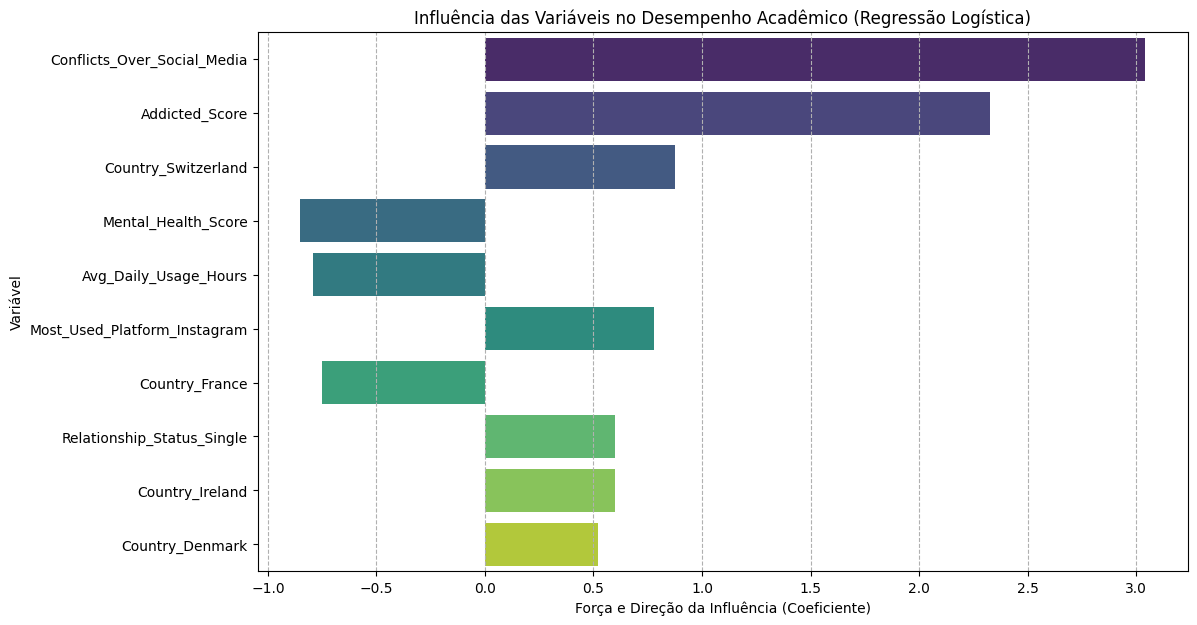

In [409]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Coeficiente', y='Feature', data=coef_df_sorted.head(10), palette='viridis')
plt.title('Influência das Variáveis no Desempenho Acadêmico (Regressão Logística)')
plt.xlabel('Força e Direção da Influência (Coeficiente)')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--')
plt.show()

In [410]:
y_proba = modelo_principal.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

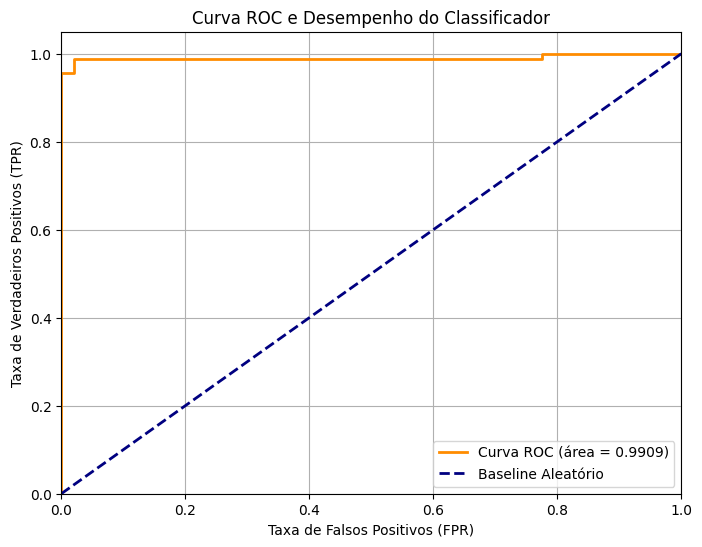


Valor de AUC: 0.9909


In [411]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'Curva ROC (área = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline Aleatório')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC e Desempenho do Classificador')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"\nValor de AUC: {roc_auc:.4f}")

## 8 - Conclusão

texto